In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "
# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

automobile_filename = 'Automobile.csv'
# load the data
automobile = pd.read_csv(automobile_filename, sep='#', engine='python', # need to set both # and ## as separators
                        index_col=False, # column headers not matching columns, so I added index_col=False to tell pandas to include the first column in the DataFrame
                        header=None, #since there is no existing header for the data
                        names=['Symboling', 'Normalised-losses', 'Make', 'Fuel-type',
                              'Aspiration', 'Num-of-doors', 'Body-style', 'Drive-wheels',
                              'Engine-location', 'Wheel-base', 'Length', 'Width', 'Height','Curb-weight',
                              'Engine-type', 'Num-of-cylinders', 'Engine-size', 'Fuel-system',
                              'Bore', 'Stroke', 'Compression-ratio', 'Horsepower', 'Peak-rpm',
                              'City-mpg', 'Highway-mpg', 'Price'],) 

# checking equivalent to original data
automobile.head()

,Symboling,Normalised-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
# summary of dataset types to know which ones to check
automobile.info()
# columns with values that are objects (strings) need checking, as well as those that don't add up to 238 elements (indicates missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 26 columns):
Symboling            238 non-null int64
Normalised-losses    191 non-null float64
Make                 238 non-null object
Fuel-type            238 non-null object
Aspiration           238 non-null object
Num-of-doors         236 non-null object
Body-style           238 non-null object
Drive-wheels         238 non-null object
Engine-location      238 non-null object
Wheel-base           238 non-null float64
Length               238 non-null float64
Width                238 non-null float64
Height               238 non-null float64
Curb-weight          238 non-null int64
Engine-type          238 non-null object
Num-of-cylinders     238 non-null object
Engine-size          238 non-null int64
Fuel-system          238 non-null object
Bore                 234 non-null float64
Stroke               234 non-null float64
Compression-ratio    238 non-null float64
Horsepower           236 non-

In [3]:
# check errors in symboling column
automobile['Symboling'].value_counts()
# 4 is an impossible value
symbolingmedian = automobile['Symboling'].median() #since value has to be an integer and most values are aggregated in 0 and 1
# replace impossible values with median
automobile['Symboling'].replace({4:symbolingmedian}, inplace=True)
automobile['Symboling'].value_counts()
# Symboling column cleaned!

 0.0    70
 1.0    54
-1.0    52
 2.0    32
 3.0    27
-2.0     3
Name: Symboling, dtype: int64

In [4]:
# checking errors in Normalised-losses
automobile['Normalised-losses'].value_counts()
# all counts are numerical (valid), but have missing values that need replacing
automobile['Normalised-losses']\
    .fillna(automobile['Normalised-losses']\
    .mean(axis=0), inplace=True)
automobile.head()
# Normalised-losses column cleaned!

,Symboling,Normalised-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3.0,116.863874,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3.0,116.863874,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1.0,116.863874,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2.0,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2.0,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
# checking errors in Make
# volvo has redundant whitespaces, remove all whitespaces from column
automobile['Make'] = automobile['Make'].str.strip()
# cleaning typos and capital mismatches
automobile['Make'] = automobile['Make'].str.lower()
# vol00112ov should be volvo! use replace argument
automobile['Make'].replace({"vol00112ov":"volvo"}, inplace=True)
automobile["Make"].value_counts()
# Make column cleaned!
# want to know mean count 

volvo            44
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: Make, dtype: int64

In [6]:
# checking Fuel-type column
# cleaning capital mismatches
automobile["Fuel-type"] = automobile["Fuel-type"].str.lower()
# removing white spaces
automobile['Fuel-type'] = automobile['Fuel-type'].str.strip()
automobile["Fuel-type"].value_counts()
# Fuel-type column cleaned

gas       210
diesel     28
Name: Fuel-type, dtype: int64

In [7]:
# Checking Aspiration column
# cleaning capital mismatches
automobile["Aspiration"] = automobile["Aspiration"].str.lower()
# remove all whitespaces from column
automobile['Aspiration'] = automobile['Aspiration'].str.strip()
# correct typos
automobile['Aspiration'].replace({"turrrrbo":"turbo"}, inplace=True)
automobile["Aspiration"].value_counts()
# cleaned

std      178
turbo     60
Name: Aspiration, dtype: int64

In [8]:
# checking Num-of-doors
# cleaning capital mismatches
automobile["Num-of-doors"] = automobile["Num-of-doors"].str.lower()
# remove all whitespaces from column
automobile['Num-of-doors'] = automobile['Num-of-doors'].str.strip()
# correct typos
automobile['Num-of-doors'].replace({"fourR":"four", "fourr":"four"}, inplace=True)
# check for missing values
null_columns=automobile.columns[automobile.isnull().any()]
print(automobile[automobile["Num-of-doors"].isnull()][null_columns])
# there are only two missing values on rows 27 and 63, just drop them
automobile['Num-of-doors'].dropna(how='all')
# cleaned

   Num-of-doors  Bore  Stroke  Horsepower  Peak-rpm    Price
27          NaN  3.03    3.39       102.0    5500.0   8558.0
63          NaN  3.39    3.39        64.0    4650.0  10795.0


0       two
1       two
2       two
3      four
4      four
       ... 
233    four
234    four
235    four
236    four
237    four
Name: Num-of-doors, Length: 236, dtype: object

In [9]:
# checking Body-style column
# cleaning capital mismatches
automobile["Body-style"] = automobile["Body-style"].str.lower()
# remove all whitespaces from column
automobile['Body-style'] = automobile['Body-style'].str.strip()
automobile["Body-style"].value_counts()

sedan          127
hatchback       70
wagon           27
hardtop          8
convertible      6
Name: Body-style, dtype: int64

In [10]:
# checking Drive-wheels column
# cleaning capital mismatches
automobile["Drive-wheels"] = automobile["Drive-wheels"].str.lower()
# remove all whitespaces from column
automobile['Drive-wheels'] = automobile['Drive-wheels'].str.strip()
automobile["Drive-wheels"].value_counts()

fwd    120
rwd    109
4wd      9
Name: Drive-wheels, dtype: int64

In [11]:
# checking Engine-location column
# cleaning capital mismatches
automobile["Engine-location"] = automobile["Engine-location"].str.lower()
# remove all whitespaces from column
automobile['Engine-location'] = automobile['Engine-location'].str.strip()
automobile["Engine-location"].value_counts()

front    235
rear       3
Name: Engine-location, dtype: int64

In [12]:
# check for zero values
automobile['Wheel-base'].eq(0).any().any() #checked this is False :) 
# check Wheel-base
automobile["Wheel-base"].value_counts() #no issues

109.1    36
94.5     21
93.7     20
95.7     13
96.5      8
104.3     8
98.4      7
97.3      7
98.8      6
107.9     6
99.1      6
96.3      6
100.4     6
93.1      5
102.4     5
97.2      5
95.9      5
101.2     4
114.2     4
95.3      4
97.0      4
105.8     3
89.5      3
110.0     3
103.5     3
115.6     2
104.5     2
113.0     2
96.9      2
88.6      2
86.6      2
96.1      2
102.9     2
104.9     2
99.8      2
103.3     2
91.3      2
96.6      1
102.0     1
99.5      1
120.9     1
94.3      1
99.2      1
96.0      1
108.0     1
112.0     1
93.0      1
95.1      1
88.4      1
102.7     1
93.3      1
99.4      1
106.7     1
Name: Wheel-base, dtype: int64

In [13]:
# check Length
# check for zero values
automobile['Length'].eq(0).any().any() #checked this is False :) 
automobile["Length"].value_counts() #no issues

188.8    44
157.3    15
166.3     7
171.7     7
186.7     7
         ..
157.9     1
177.3     1
175.7     1
193.8     1
183.1     1
Name: Length, Length: 75, dtype: int64

In [14]:
# check Width
# check for zero values
automobile['Width'].eq(0).any().any() #checked this is False :) 
automobile["Width"].value_counts() #no issues

68.9    30
63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
67.2     8
65.2     7
68.8     6
65.6     6
66.3     6
64.2     6
66.9     5
67.9     5
65.7     4
64.8     4
63.9     3
70.3     3
71.4     3
65.0     3
71.7     3
64.6     2
64.1     2
67.7     2
66.1     2
68.3     2
69.6     2
61.8     1
72.0     1
63.4     1
62.5     1
66.0     1
72.3     1
70.5     1
70.9     1
68.0     1
66.2     1
70.6     1
66.4     1
60.3     1
66.6     1
Name: Width, dtype: int64

In [15]:
# check Height
# check for zero values
automobile['Height'].eq(0).any().any() #checked this is False :) 
automobile["Height"].value_counts() #no issues


55.5    40
50.8    14
52.0    12
55.7    12
54.5    10
54.1    10
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
54.9     6
50.2     6
52.8     6
57.5     5
53.7     5
55.1     5
50.6     5
53.3     4
49.6     4
58.7     4
53.5     3
49.7     3
59.1     3
56.2     3
52.5     3
54.4     2
49.4     2
48.8     2
56.3     2
51.4     2
59.8     2
56.5     2
54.7     2
53.9     2
50.5     2
56.0     1
51.0     1
52.4     1
55.4     1
55.6     1
53.2     1
58.3     1
55.9     1
47.8     1
54.8     1
53.1     1
55.2     1
Name: Height, dtype: int64

In [16]:
# check Curb-weight
# check for zero values
automobile['Curb-weight'].eq(0).any().any() #checked this is False :) 
automobile["Curb-weight"].value_counts() #no issues

3062    9
3217    9
3012    6
3049    6
2952    6
       ..
2037    1
2465    1
2976    1
1951    1
2304    1
Name: Curb-weight, Length: 171, dtype: int64

In [17]:
# some columns not checked since the summary shows that there are no missing values and no impossible values
# moving onto the Engine-type column
# cleaning capital mismatches
automobile["Engine-type"] = automobile["Engine-type"].str.lower()
# remove all whitespaces from column
automobile['Engine-type'] = automobile['Engine-type'].str.strip()
#checking typos
automobile['Engine-type'].replace({"dohcv":"dohc", }, inplace=True) #there is no such thing as dohcv engine
automobile["Engine-type"].value_counts()

ohc      176
ohcv      18
ohcf      15
dohc      13
l         12
rotor      4
Name: Engine-type, dtype: int64

In [18]:
# Num-of-cylinders column
# treat lower and upper case the same
automobile["Num-of-cylinders"] = automobile["Num-of-cylinders"].str.lower()
# remove all whitespaces from column
automobile['Num-of-cylinders'] = automobile['Num-of-cylinders'].str.strip()
#checking typos
automobile['Num-of-cylinders']
automobile["Num-of-cylinders"].value_counts()

four      179
six        37
five       11
eight       5
two         4
twelve      1
three       1
Name: Num-of-cylinders, dtype: int64

In [19]:
# check Engine-size
# check for zero values
automobile['Engine-size'].eq(0).any().any() #checked this is False :) 
automobile["Engine-size"].value_counts() #no issues

141    25
122    15
92     15
98     14
97     14
108    13
110    12
90     12
145     9
109     8
120     7
121     6
130     6
146     6
152     6
173     6
181     6
156     5
91      5
136     5
183     4
164     3
171     3
209     3
194     3
70      3
234     2
258     2
131     2
132     2
134     2
140     2
79      1
304     1
308     1
61      1
326     1
111     1
80      1
203     1
119     1
151     1
103     1
161     1
Name: Engine-size, dtype: int64

In [20]:
# check Fuel-system column
# treat lower and upper case the same
automobile["Fuel-system"] = automobile["Fuel-system"].str.lower()
# remove all whitespaces from column
automobile['Fuel-system'] = automobile['Fuel-system'].str.strip()
#checking typos
automobile['Fuel-system'].replace({"mfi":"mpfi", }, inplace=True)
automobile["Fuel-system"].value_counts()

mpfi    120
2bbl     66
idi      28
1bbl     11
spdi      9
4bbl      3
spfi      1
Name: Fuel-system, dtype: int64

In [21]:
# check Bore column
# check for zero values
automobile['Bore'].eq(0).any().any() #checked this is False :) 
# check for missing values that need replacing
automobile['Bore']\
    .fillna(automobile['Bore']\
    .mean(axis=0), inplace=True)
# Bore column cleaned
automobile['Bore'].value_counts()

3.780000    26
3.620000    25
3.190000    20
3.150000    15
3.010000    13
2.970000    12
3.030000    12
3.580000    11
3.460000     9
3.310000     8
3.430000     8
2.910000     7
3.270000     7
3.540000     6
3.390000     6
3.050000     6
3.700000     5
3.361282     4
3.350000     4
3.590000     3
3.740000     3
3.170000     3
3.470000     2
3.800000     2
3.330000     2
3.130000     2
3.940000     2
3.240000     2
3.500000     2
3.630000     2
2.990000     1
3.080000     1
2.680000     1
3.600000     1
3.610000     1
3.340000     1
2.540000     1
2.920000     1
3.760000     1
Name: Bore, dtype: int64

In [22]:
# check Stroke column
# check for zero values 
automobile['Stroke'].eq(0).any().any() #checked this is False :) 
# all counts are numerical (valid), but have missing values that need replacing
automobile['Stroke']\
    .fillna(automobile['Stroke']\
    .mean(axis=0), inplace=True)
automobile['Stroke'].value_counts()

3.15000    34
3.40000    28
3.03000    14
3.23000    14
3.39000    13
2.64000    11
3.35000     9
3.29000     9
3.46000     8
3.27000     6
3.19000     6
2.87000     6
3.07000     6
3.11000     6
3.58000     6
3.50000     6
3.41000     6
3.64000     5
3.52000     5
3.86000     4
3.47000     4
3.54000     4
3.24312     4
2.90000     3
3.90000     3
3.10000     2
3.08000     2
2.80000     2
2.68000     2
2.19000     2
4.17000     2
3.16000     1
2.76000     1
2.07000     1
3.12000     1
3.21000     1
2.36000     1
Name: Stroke, dtype: int64

In [23]:
# check Compression-ratio
# check for zero values
automobile['Compression-ratio'].eq(0).any().any() #checked this is False :) 
automobile["Compression-ratio"].value_counts() #no issues

9.00     46
9.40     26
9.50     26
8.50     14
8.70     14
23.00    13
9.30     11
8.00      8
8.80      8
9.20      8
7.00      7
7.50      7
9.60      5
8.40      5
21.00     5
8.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
7.70      2
8.10      2
9.31      1
21.90     1
22.00     1
11.50     1
9.41      1
10.10     1
9.10      1
22.70     1
7.80      1
Name: Compression-ratio, dtype: int64

In [24]:
# check Horsepower column
# check for zero values 
automobile['Horsepower'].eq(0).any().any() #checked this is False :) 
# all counts are numerical (valid), but have missing values that need replacing
automobile['Horsepower']\
    .fillna(automobile['Horsepower']\
    .mean(axis=0), inplace=True)

In [25]:
# check Peak-rpm column
# check for zero values 
automobile['Peak-rpm'].eq(0).any().any() #checked this is False :) 
# all counts are numerical (valid), but have missing values that need replacing
automobile['Peak-rpm']\
    .fillna(automobile['Peak-rpm']\
    .mean(axis=0), inplace=True)
automobile["Peak-rpm"].value_counts()

4800.000000    44
5500.000000    42
5000.000000    27
5400.000000    26
5200.000000    23
6000.000000     9
4500.000000     7
5800.000000     7
5250.000000     7
5300.000000     6
4200.000000     5
5100.000000     5
4150.000000     5
4750.000000     4
4350.000000     4
4400.000000     3
4250.000000     3
5900.000000     3
6600.000000     2
5140.889831     2
4650.000000     1
5750.000000     1
4900.000000     1
5600.000000     1
Name: Peak-rpm, dtype: int64

In [26]:
# check City-mpg
# check for zero values
automobile['City-mpg'].eq(0).any().any() #checked this is False :) 
automobile["City-mpg"].value_counts() #no issues

19    40
31    28
24    22
26    20
23    17
17    15
27    14
18     8
21     8
30     8
25     8
28     7
38     7
16     6
37     6
22     4
15     3
29     3
20     3
14     2
49     1
47     1
32     1
33     1
34     1
35     1
36     1
45     1
13     1
Name: City-mpg, dtype: int64

In [27]:
# check Highway-mpg column
# check for zero values
automobile['Highway-mpg'].eq(0).any().any() #checked this is False :) 
automobile["Highway-mpg"].value_counts() #no issues

25    32
28    18
24    17
38    17
30    16
32    16
34    14
37    13
27    13
23    12
29    10
22    10
33     9
31     8
43     4
41     3
42     3
26     3
20     2
19     2
18     2
16     2
36     2
39     2
46     2
47     2
53     1
50     1
17     1
54     1
Name: Highway-mpg, dtype: int64

In [28]:
# check Price column
# all counts are numerical (valid), but have missing values that need replacing
automobile['Price']\
    .fillna(automobile['Price']\
    .mean(axis=0), inplace=True)
automobile["Price"].value_counts()
# there are 6 values that are 0. These values are impossible as a car would not be free!
pricemean = automobile['Price'].mean()
# replace impossible values with mean
automobile['Price'].replace({0:pricemean}, inplace=True)
automobile['Price'].value_counts()

13696.081197    10
19045.000000     6
22470.000000     6
22625.000000     6
21485.000000     6
                ..
6377.000000      1
30760.000000     1
16925.000000     1
15998.000000     1
18920.000000     1
Name: Price, Length: 187, dtype: int64

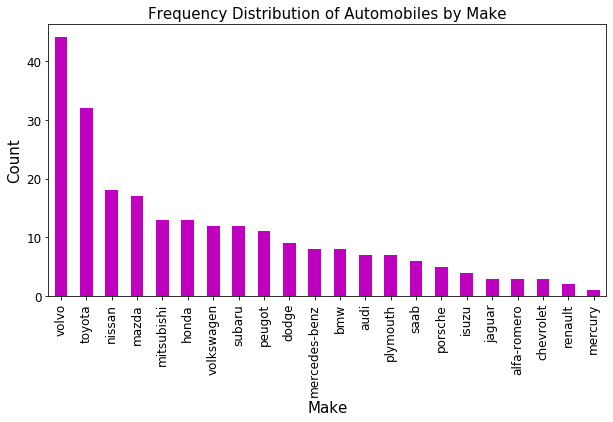

In [29]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values


#Code goes after this line

# extract column with nominal values 
automobile['Make']

# bar chart for makes distribution
automobile['Make'].value_counts().plot(kind='bar', 
                                       align='center', 
                                       color='m', figsize=(10,5), 
                                       fontsize=12)
plt.xlabel('Make', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Frequency Distribution of Automobiles by Make', fontsize=15)
plt.show()

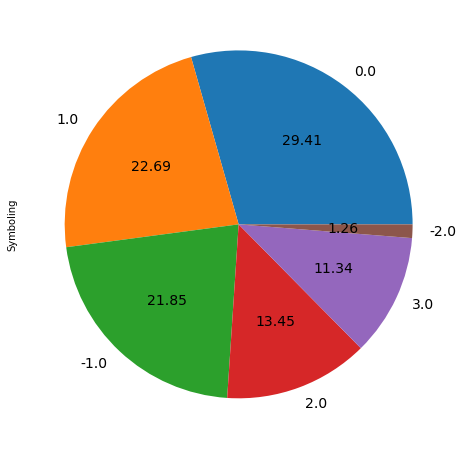

In [30]:
# extract column with ordinal values
automobile['Symboling']
# pie chart for symboling distribution
automobile['Symboling']\
    .value_counts() \
    .plot(kind='pie', autopct='%.2f', figsize=(8,8), fontsize=14)
plt.show()

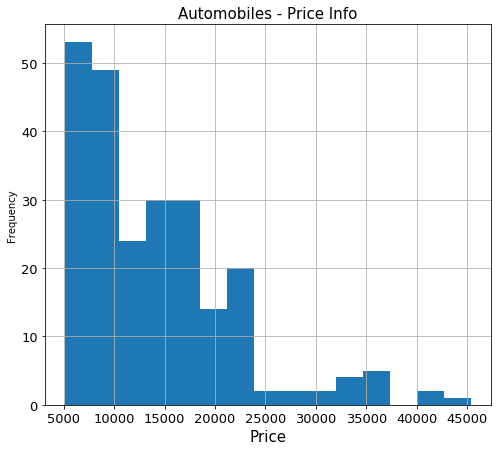

In [31]:
# column with numerical values
automobile['Price']
# histogram to show price variation
automobile['Price'].plot(kind='hist', bins=15, figsize=(8,7), fontsize=13)
plt.title('Automobiles - Price Info', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.grid()
plt.show()

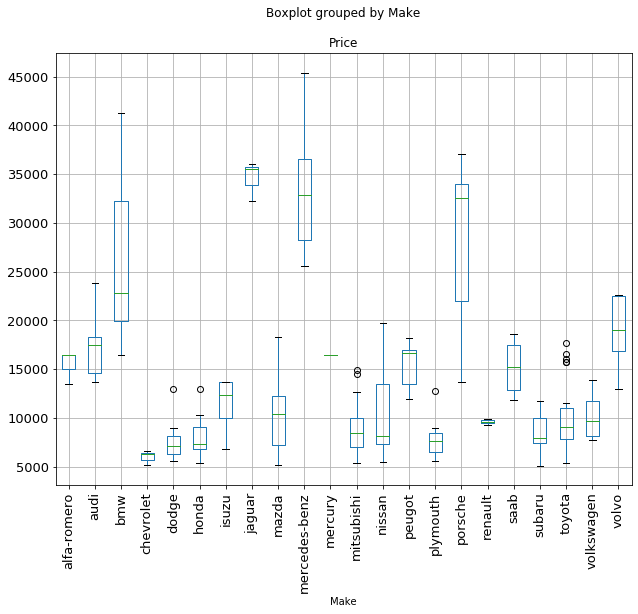

In [32]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line
# box plot for make and price
automobile.dropna().boxplot(column='Price', by='Make',figsize=(10,8),
                           fontsize=13, rot=90)
plt.show()

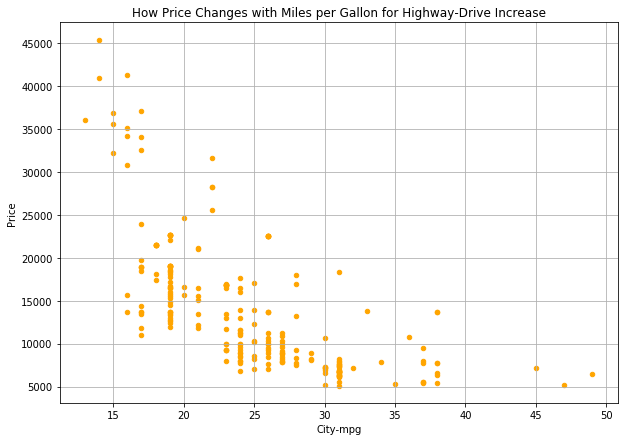

In [33]:
# scatter plot for city-mpg and price
automobile.plot(kind='scatter',
               x='City-mpg', y='Price',
               c='Orange', figsize=(10,7))
plt.title('How Price Changes with Miles per Gallon for Highway-Drive Increase')
plt.grid()
plt.show()

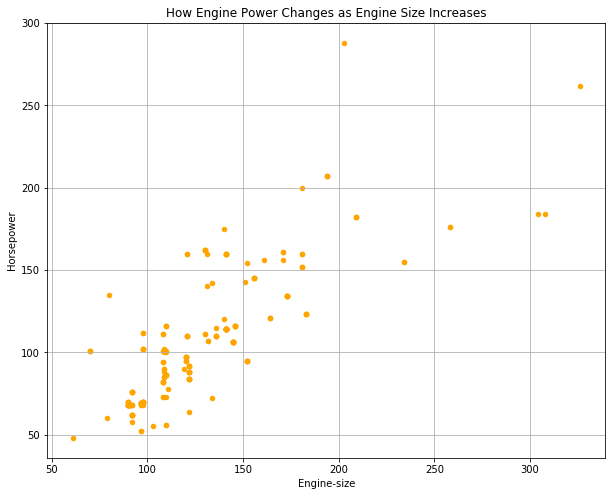

In [34]:
# scatter plot for Engine-size and Horsepower
automobile.plot(kind='scatter',
               x='Engine-size', y='Horsepower',
               c='Orange', figsize=(10,8))
plt.title('How Engine Power Changes as Engine Size Increases')
plt.grid()
plt.show()

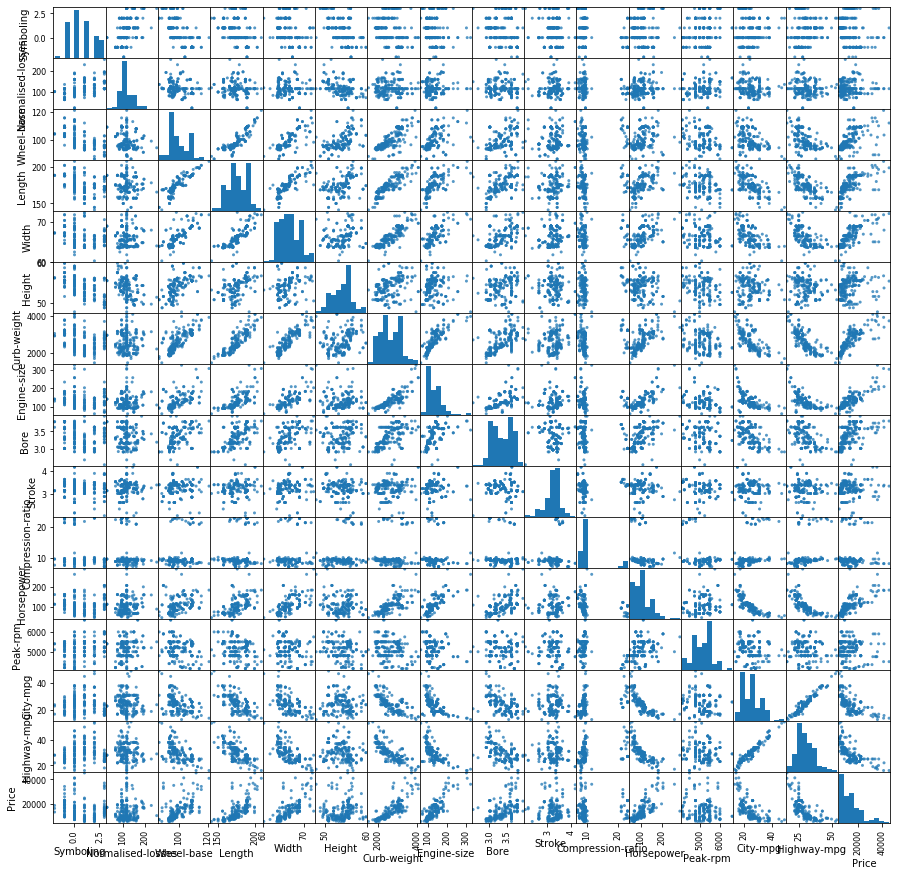

In [35]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line # Select just the numeric columns (excluding object values)
numeric_columns = ['Symboling','Normalised-losses','Wheel-base','Length','Width','Height','Curb-weight',
                  'Engine-size','Bore','Stroke','Compression-ratio','Horsepower','Peak-rpm',
                  'City-mpg','Highway-mpg','Price']
#make scatter matrix of numeric columns
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(automobile[numeric_columns], alpha=0.75, figsize=(15,15),
                           diagonal='hist')
plt.show()